# Ejemplos de Large Language Model (LLM) disponibles en HuggingFace para procesamiento de Imágenes

https://huggingface.co/models

In [ ]:
#@title Controla que se ejecute con GPU
import torch

if torch.cuda.is_available():
  print("GPU encontrado.")
else:
  raise Exception("GPU no encontrado, se cancela la ejecución porque sino es muy lento!!!!")


GPU encontrado.


In [ ]:
#@title Instalar paquete Transformers de HuggingFace
!pip install transformers

In [ ]:
#@title Instalar paquete Diffusers de HuggingFace

!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.4 MB/s eta 0:00:00


In [ ]:
#@title Instalar otras librerías

!pip install fairseq

!pip install sentencepiece

!pip install accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 34.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=11291818 sha256=ceb108daa4dd828d4e83ae39bd8ee068f881c2281c5eeec564be2022aaa615c4
  Stored in directory: /root/.cache/pip/wheels/e4/35/55/9c66f65ec7c83fd6fbc2b9502a0ac81b2448a1196159dacc32
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.wh

In [ ]:
#@title Cargar Librerías

import torch  # nota: usa Torch porque con TF directo tira error

import transformers

from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionImageVariationPipeline
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from torchvision import transforms
from fairseq import utils

#import IPython.display as ipd
from IPython.display import Audio, display
import textwrap

from PIL import Image
import requests # request img from web
import shutil # save img locally

print("Librerías cargadas.")

# determina si usa GPU o CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Device: ", device)


Librerías cargadas.
Device:  cuda:0


#Modelo Text-To-Image (TTI)

In [ ]:
#@title Cargar Modelo TTI

TTI_model_id = "runwayml/stable-diffusion-v1-5" #@param [ "runwayml/stable-diffusion-v1-5", "stabilityai/stable-diffusion-xl-base-1.0" ]

#@markdown otros modelos disponibles en: https://huggingface.co/models?pipeline_tag=text-to-image&sort=trending


TTI_pipe = StableDiffusionPipeline.from_pretrained(TTI_model_id) #, torch_dtype=torch.float16)
TTI_pipe = TTI_pipe.to("cuda")

def genImage(text):
  return TTI_pipe(text).images[0]

print("\nModelo ", TTI_model_id, " cargado.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.



Modelo  runwayml/stable-diffusion-v1-5  cargado.


  0%|          | 0/50 [00:00<?, ?it/s]



>  San Martín cabalgaba en su caballo blanco cuando ataco al enemigo.


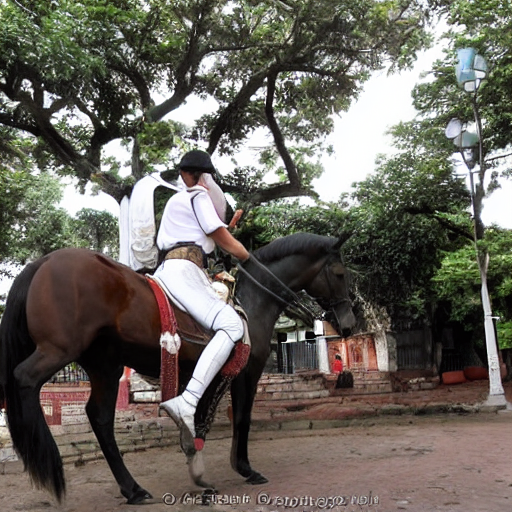

In [ ]:
#@title Probar Modelo TTI 1

text_to_image = "San Martín cabalgaba en su caballo blanco cuando ataco al enemigo." #@param {type:"string"}

# ejecuta el modelo
img1 = genImage(text_to_image)

print("\n")
print("> ", textwrap.fill(text_to_image, 100))
display( img1 )

  0%|          | 0/50 [00:00<?, ?it/s]



>  un atardecer sobre el mar, con una playa  paradisiaca con varias palmeras


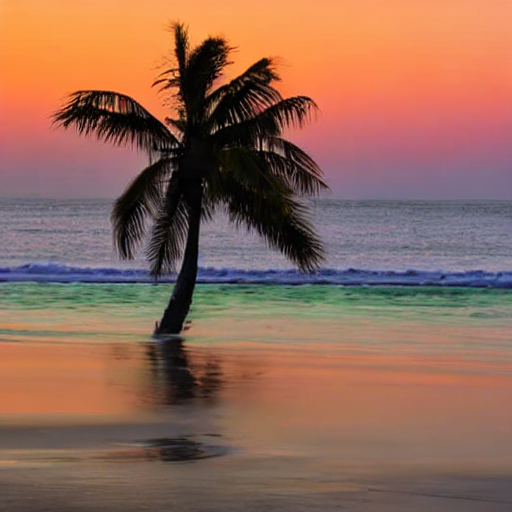

In [ ]:
#@title Probar Modelo TTI 2

text_to_image = "un atardecer sobre el mar, con una playa  paradisiaca con varias palmeras" #@param {type:"string"}

# ejecuta el modelo
img2 = genImage(text_to_image)

print("\n")
print("> ", textwrap.fill(text_to_image, 100))
display( img2 )

#Modelo Image-To-Image (ITI)

In [ ]:
#@title Cargar Modelo ITI

ITI_model_name = "lambdalabs/sd-image-variations-diffusers" #@param [ "lambdalabs/sd-image-variations-diffusers" ]

#@markdown otros modelos disponibles en: https://huggingface.co/models?pipeline_tag=image-to-image&sort=trending





ITI_sd_pipe = StableDiffusionImageVariationPipeline.from_pretrained(
  ITI_model_name,
  revision="v2.0",
  )
ITI_sd_pipe = ITI_sd_pipe.to(device)

# determina transformaciones para la imagen
ITI_tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])

def gen_variations(im):
  # procesa imagen
  inp = ITI_tform(im).to(device).unsqueeze(0)
  # ajusta salida
  out = ITI_sd_pipe(inp, guidance_scale=3)
  return out["images"][0]

def descargar_imagen(imagen_URL):
  if imagen_URL == "":
    return None
  # baja la imagen
  URL_file_name = "./donwload_image.jpg"
  res = requests.get(imagen_URL, stream = True)
  if res.status_code == 200:
      with open(URL_file_name,'wb') as f:
          shutil.copyfileobj(res.raw, f)
  else:
      print('No se puede desacargar la imagen')
      return None
  # abre la imagen bajada
  URL_imag = Image.open(URL_file_name)
  return URL_imag

print("\nModelo ", ITI_model_name, " cargado.")

model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/703 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.



Modelo  lambdalabs/sd-image-variations-diffusers  cargado.


> Imagen descargada: 


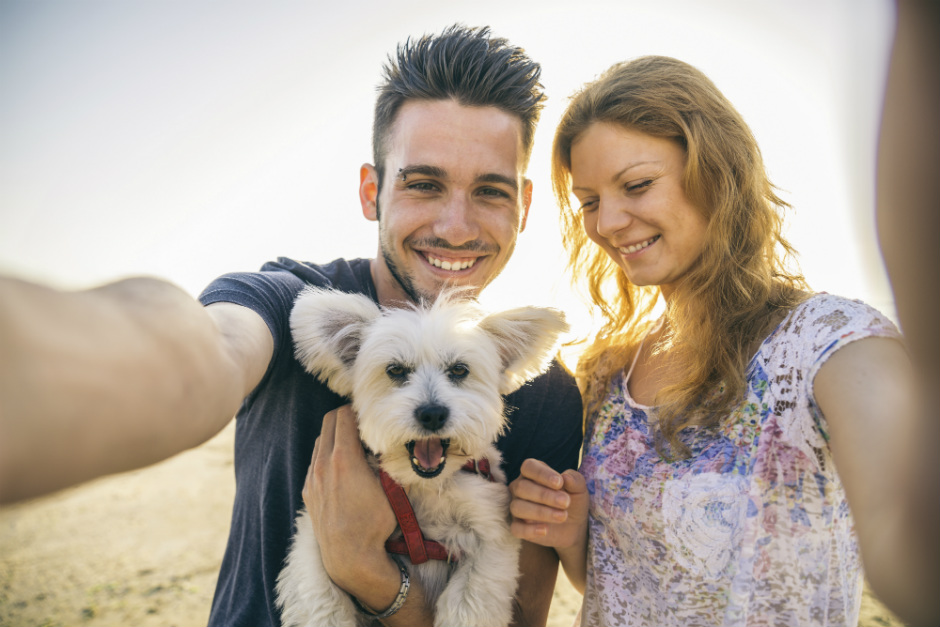



> Variación de la Imagen: 


  0%|          | 0/50 [00:00<?, ?it/s]

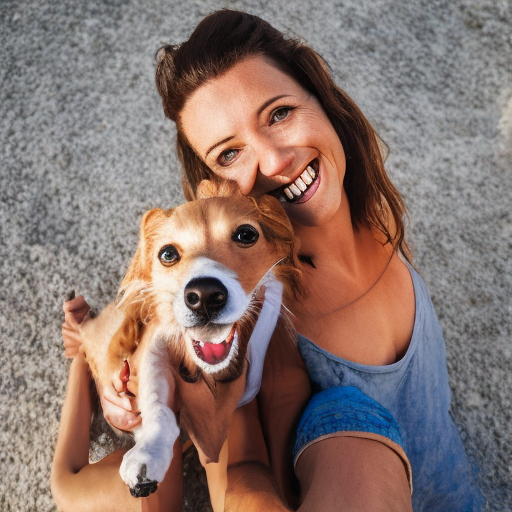

In [ ]:
#@title Probar Modelo ITI 1

imagen_URL = "https://static.fundacion-affinity.org/cdn/farfuture/54n76QrL7YrsyLSTQlAzpJnwCz54nW1MsmYw2QJcIII/mtime:1528830295/sites/default/files/antrozoologia-conociendo-el-vinculo-entre-personas-y-otros-animales.jpg" #@param {type:"string"}

# descarga imagen base
URL_imag = descargar_imagen( imagen_URL )

if URL_imag is None:
    print("No se pudo descargar la imagen de ", URL_imag)
else:
    print("> Imagen descargada: ")
    display( URL_imag )

    # procesa laa imagen
    print("\n\n> Variación de la Imagen: ")
    varImg = gen_variations(URL_imag)
    display( varImg )

> Imagen descargada: 


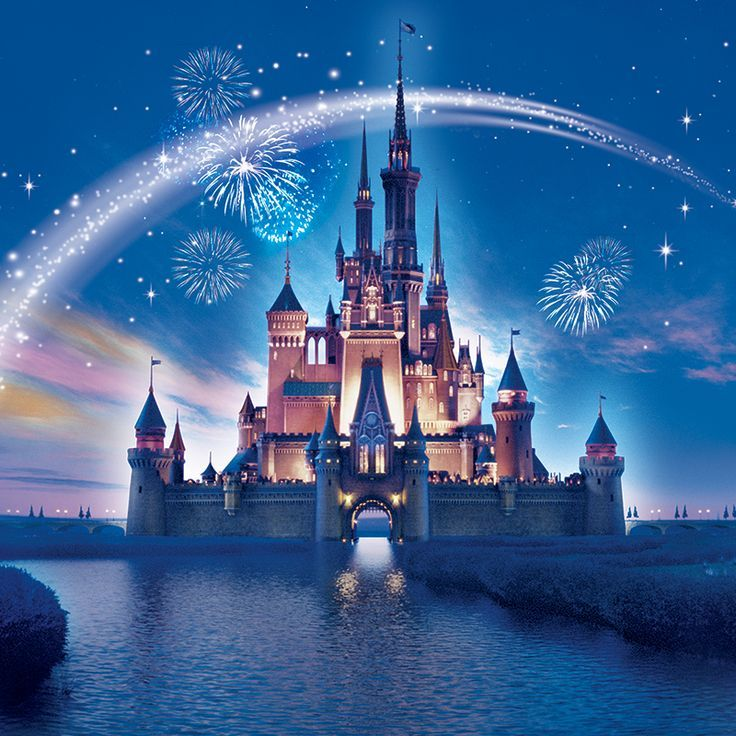



> Variación de la Imagen: 


  0%|          | 0/50 [00:00<?, ?it/s]

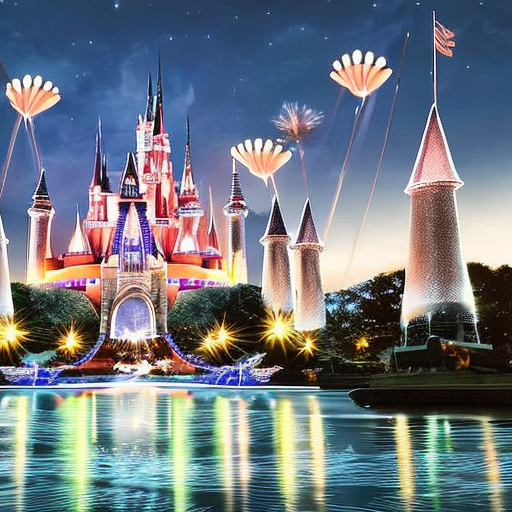

In [ ]:
#@title Probar Modelo ITI 2

imagen_URL = "https://juanlive.com.co/wp-content/uploads/2476d01db0b5e0417259c81e61c71fcd.jpg" #@param {type:"string"}

# descarga imagen base
URL_imag = descargar_imagen( imagen_URL )

if URL_imag is None:
    print("No se pudo descargar la imagen de ", URL_imag)
else:
    print("> Imagen descargada: ")
    display( URL_imag )

    # procesa laa imagen
    print("\n\n> Variación de la Imagen: ")
    varImg = gen_variations(URL_imag)
    display( varImg )

#Modelo Image-To-Text (ITT)

In [ ]:
#@title Cargar Modelo ITT

ITT_model_name = "nlpconnect/vit-gpt2-image-captioning" #@param [ "nlpconnect/vit-gpt2-image-captioning" ]

#@markdown otros modelos disponibles en: https://huggingface.co/models?pipeline_tag=image-to-text&sort=trending

ITT_model = VisionEncoderDecoderModel.from_pretrained(ITT_model_name)
ITT_feature_extractor = ViTImageProcessor.from_pretrained(ITT_model_name)
ITT_tokenizer = AutoTokenizer.from_pretrained(ITT_model_name)

ITT_model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}


def gen_description(img):

  # prepara imagen
  images = []
  if img.mode != "RGB":
    img = img.convert(mode="RGB")
  images.append(img)

  pixel_values = ITT_feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = ITT_model.generate(pixel_values, **gen_kwargs)

  preds = ITT_tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

print("\nModelo ", ITT_model_name, " cargado.")

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]


Modelo  nlpconnect/vit-gpt2-image-captioning  cargado.


> Imagen descargada: 


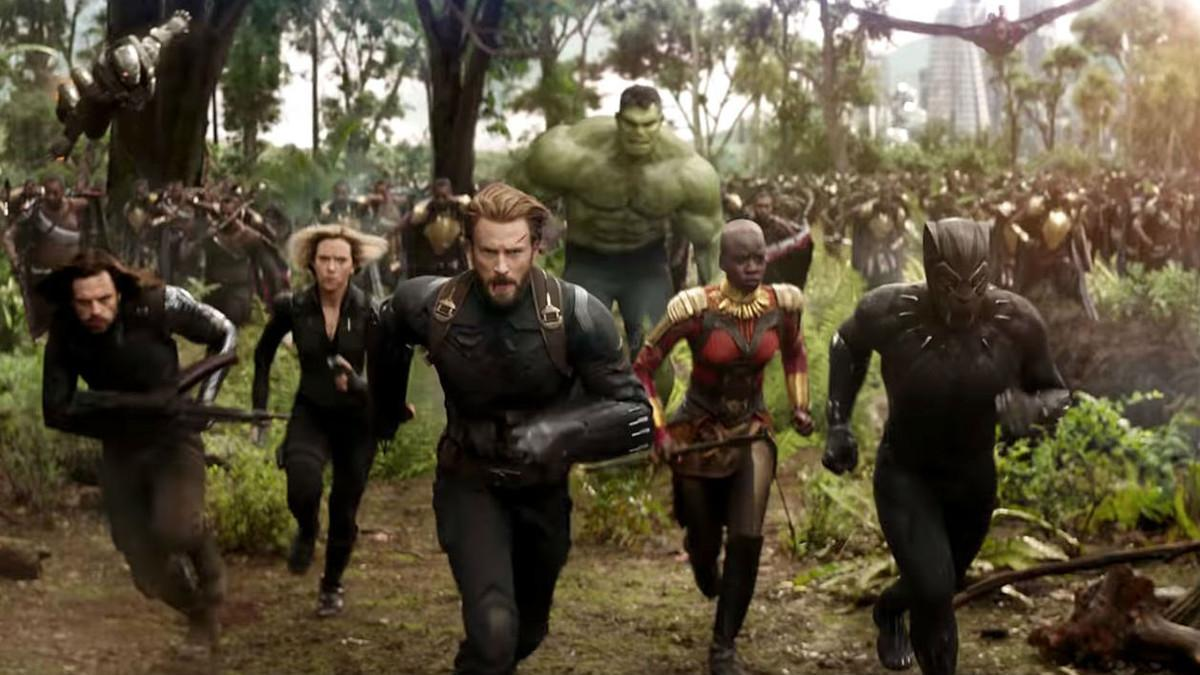

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


--> people dressed up in costumes and posing for a picture


In [ ]:
#@title Probar Modelo ITT 1

imagen_URL = "https://estaticos-cdn.elperiodico.com/clip/2c7d8ead-5582-404c-be3e-2f04c60eb10b_alta-libre-aspect-ratio_default_0.jpg" #@param {type:"string"}

# descarga imagen base
URL_imag = descargar_imagen( imagen_URL )

if URL_imag is None:
    print("No se pudo descargar la imagen de ", URL_imag)
else:
    print("> Imagen descargada: ")
    display( URL_imag )

    # procesa la imagen
    descList = gen_description( URL_imag )
    for d in descList:
      print("-->", textwrap.fill(d, 100))


> Imagen descargada: 


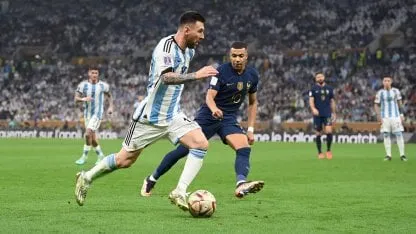

--> soccer players are playing soccer on a field


In [ ]:
#@title Probar Modelo ITT 2

imagen_URL = "https://media.tycsports.com/files/2022/12/22/518560/messi-vs-mbappe-en-la-final-del-mundial-de-qatar-2022_416x234.webp?v=2" #@param {type:"string"}

# descarga imagen base
URL_imag = descargar_imagen( imagen_URL )

if URL_imag is None:
    print("No se pudo descargar la imagen de ", URL_imag)
else:
    print("> Imagen descargada: ")
    display( URL_imag )

    # procesa la imagen
    descList = gen_description( URL_imag )
    for d in descList:
      print("-->", textwrap.fill(d, 100))


# Probar Modelos combinados

  0%|          | 0/50 [00:00<?, ?it/s]



>  grupo de personas bailando en fiesta de casamiento


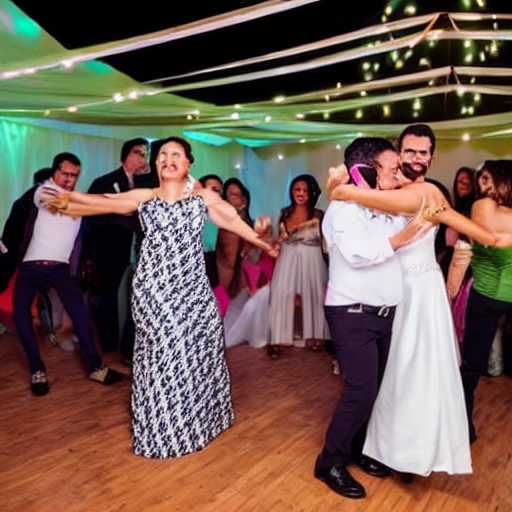

--> a woman standing next to a man in a room


> Variación de la Imagen #1: 


  0%|          | 0/50 [00:00<?, ?it/s]

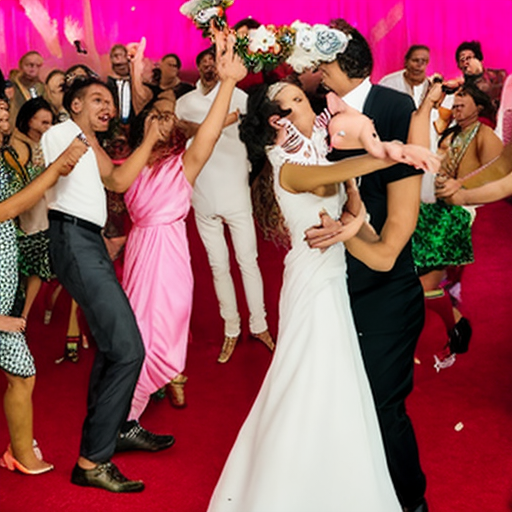

--> a crowd of people standing around a bride and groom


> Variación de la Imagen #2: 


  0%|          | 0/50 [00:00<?, ?it/s]

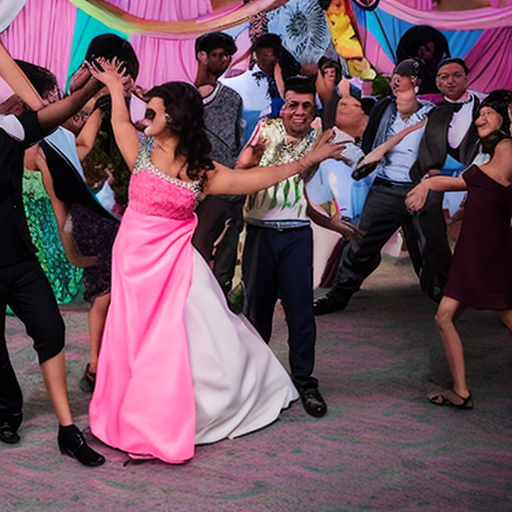

--> a bride and groom cutting their wedding cake


> Variación de la Imagen #3: 


  0%|          | 0/50 [00:00<?, ?it/s]

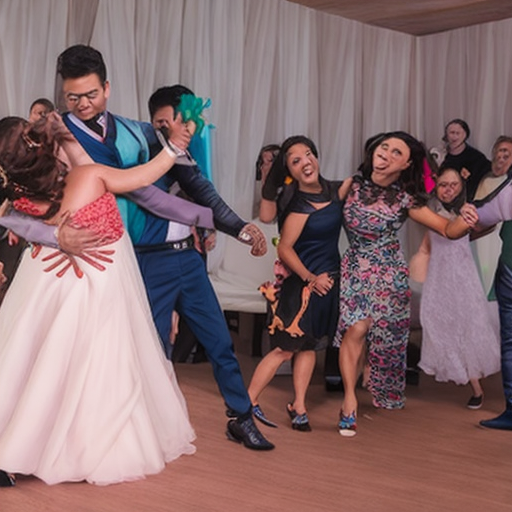

--> a bride and groom cutting their wedding cake


In [ ]:
#@title Probar Todos los Modelos

texto = "grupo de personas bailando en fiesta de casamiento" #@param {type:"string"}
cant_variaciones = 3 #@param {type:"integer"}

if cant_variaciones < 1:
  cant_variaciones = 1

# ejecuta el modelo TTI
genImag = genImage(texto)

print("\n")
print("> ", textwrap.fill(texto, 100))
display( genImag )

# procesa la imagen ITT
descList = gen_description( genImag )
for d in descList:
  print("-->", textwrap.fill(d, 100))

# genera variación de la imagen
for i in range(cant_variaciones):
    # procesa la imagen por modelo ITI
    print("\n\n> Variación de la Imagen #"+str(i+1)+": ")
    varImg = gen_variations(genImag)
    display( varImg )

    # procesa la imagen ITT
    descList = gen_description( varImg )
    for d in descList:
      print("-->", textwrap.fill(d, 100))
